In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
N = 100
D = 2

In [45]:
X = np.random.randn(N, D)
X[0:2]

array([[ 0.96929555,  0.29894342],
       [ 1.78772006,  1.46226577]])

In [46]:
# Here we will use two Gaussian. One centred at (-2, -2) and other centred at (2, 2)

In [47]:
X[:50, :] = X[:50, :] - 2*np.ones((50, D))  # first 50 points to be centred at x = -2, y = -2 i.e. (-2, 2)
X[50:, :] = X[50:, :] + 2*np.ones((50, D))  # the last 50 points to be centred ar (2, 2)

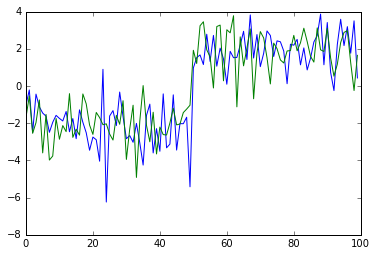

In [48]:
plt.plot(X)

In [49]:
# You can see that first 50 observations (looking at the X-axis) are centred at -2, -2 and the last 50 observations are
# centred at +2, +2.

In [50]:
T = np.array([0]*50 + [1]*50)  # 1st 50 set to 0 and next 50 set to 1
T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
# Now we will set the bias term, by concatenating the term 1
ones = np.array([[1]*N]).T
ones[0:3]

array([[1],
       [1],
       [1]])

In [52]:
Xb = np.concatenate((ones, X), axis = 1) # axis = 1 by column
Xb[0:3]

array([[ 1.        , -1.03070445, -1.70105658],
       [ 1.        , -0.21227994, -0.53773423],
       [ 1.        , -2.50055108, -2.54301369]])

In [53]:
# Randomly initialize weights
w = np.random.randn(D + 1)  # D features and 1 bias term

In [54]:
# Calculate the model output
z = Xb.dot(w)

In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [56]:
Y = sigmoid(z)

In [57]:
Y

array([ 0.79039929,  0.82600081,  0.85323435,  0.6773251 ,  0.88420869,
        0.58194754,  0.8640299 ,  0.68510566,  0.63562784,  0.84178868,
        0.7360381 ,  0.83462781,  0.74034279,  0.96008714,  0.75011558,
        0.8942994 ,  0.70243284,  0.94377994,  0.94492995,  0.93789508,
        0.86860093,  0.94196331,  0.96730092,  0.43846114,  0.99061565,
        0.75515722,  0.6699825 ,  0.89659725,  0.64638792,  0.9139469 ,
        0.73784693,  0.88440683,  0.95868823,  0.45378729,  0.92946071,
        0.99095326,  0.80576718,  0.60065052,  0.96372216,  0.70371534,
        0.93559929,  0.57291224,  0.90558709,  0.92842192,  0.78432983,
        0.9378059 ,  0.85454918,  0.89959642,  0.88925937,  0.99166301,
        0.91794086,  0.82580271,  0.94450686,  0.96550896,  0.76787541,
        0.87457253,  0.46171404,  0.96152955,  0.93143752,  0.72536787,
        0.97732575,  0.92004449,  0.96451006,  0.49222238,  0.8877283 ,
        0.62299842,  0.89879758,  0.77721452,  0.57033668,  0.74

In [58]:
# Cross Entropy is the Negative Log Likelihood

def cross_entropy(T, Y):  # T: Target (i.e. the True Class) and Y: Prediction (i.e. the output from the sigmoid func ...b/w 0 & 1)
    E = 0  # cross entropy error function
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [59]:
print(cross_entropy(T, Y))

115.54043951


In [61]:
# Now we can use the closed form solution of the logostic regression and see how good that solution is-
# Here, we have equal variances of both biases, so variance is 1 for default numpy random normal.
# So, the weights only depend on the mean.

In [63]:
# We have seen while deriving the value of weights for the LDA.
# Here, mean of one class is (2, 2) and other one is (-2, -2) and the covarince is 1 which is same for both the class
# Putting that into the weights equation we derived in the class, we get the following optimal weights and recalculate the o/p
w = np.array([0, 4, 4])
z = Xb.dot(w)
Y = sigmoid(z)
print(cross_entropy(T, Y))

0.556092156289


In [64]:
# And this is awesome. Using the correct weights from the close-form solution of the logistic regression we can see that our 
# Error function or Cross Entropy Error function is minimized. The value is 0.55, which I suppose is the Global Minimum.

In [65]:
# Here we will be visualizing the the Linear Discriminant / Bayes classifier / Gaussian Clouds

In [66]:
# Now, the classifier line is ax + by + c = 0
# Here c = 0 (bias term)
# So, y = -x is the line which classifies the data

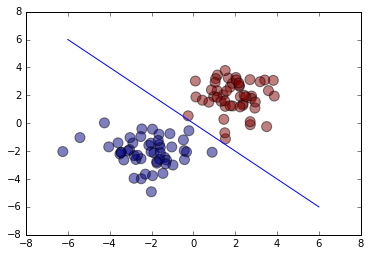

In [74]:
plt.scatter(X[:, 0], X[:, 1], c = T, s = 100, alpha = 0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

In [ ]:
# So, here we can see the two Gaussian Clouds and the Discriminant line